# ANÁLISIS DE VUELOS

_POR ERWIN EDUARDO GUERRERO CAZARES_

**1. Leerlo con R para convertirlo en un data.frame**

In [1]:
data=read.csv("C:/Users/Erwin Eduardo G.C/Documents/IFMEX/Semana1/BASES_RECIBIDAS/SEMANA1/flights.csv")

PROCEDEMOS A REALIZAR UNA PREVISUALIZACIÓN RÁPIDA Y UN BREVE ENTENDIMIENTO DEL DATASET

In [2]:
head(data,6)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>
1,2014,1,1,1,96,235,70,AS,N508AS,145,PDX,ANC,194,1542,0,1
2,2014,1,1,4,-6,738,-23,US,N195UW,1830,SEA,CLT,252,2279,0,4
3,2014,1,1,8,13,548,-4,UA,N37422,1609,PDX,IAH,201,1825,0,8
4,2014,1,1,28,-2,800,-23,US,N547UW,466,PDX,CLT,251,2282,0,28
5,2014,1,1,34,44,325,43,AS,N762AS,121,SEA,ANC,201,1448,0,34
6,2014,1,1,37,82,747,88,DL,N806DN,1823,SEA,DTW,224,1927,0,37


**VISUALIZAMOS LA DIMENSIÓN DEL DATAFRAME**

In [3]:
dim(data)

[1] 162049     16

SE TRATA DE UN DATASET MEDIANAMENTE GRANDE CON 162,049 FILAS Y 16 COLUMNAS

VISUALIZAMOS EL AÑO PARA VERIFICAR SI ESTAMOS ANTE UN DATAFRAME CON INFORMACIÓN DE DIFERENTES AÑOS O ÚNICAMENTE DEL 2014. PARA ESTO, HACEMOS USO DE LA INSTRUCCIÓN TABLE CUYO FUNCIONAMIENTO ES SIMILAR A VALUE_COUNTS DE PYTHON, ES DECIR, CUENTA LA CANTIDAD DE OCURRENCIAS DE CADA PALABRA REGRESANDO LOS VALORES ÚNICOS.

In [4]:
table(data$year) # Efectivamente, se trata de un dataset con información del 2014


  2014 
162049 

NO OBSTANTE, TRAS UNA BUSQUEDA EXHAUSTIVA EN INTERNET SE LOGRÓ DAR CON EL ORIGEN DEL DATASET QUE EXPLICA DETALLADAMENTE DE QUE SE TRATA ([Origen](https://github.com/ismayc/pnwflights14)), CITANDO:

_Contiene información sobre todos los vuelos que partieron de los dos principales aeropuertos del Pacífico Noroeste (PNW), SEA en Seattle y PDX en Portland, en 2014: 162.049 vuelos en total._

Entendido el dataset, ahora pasamos a realizar las tareas encomendadas en el classroom.

**2. Seleccionar aquellas filas cuyo retraso es negativo, y guardarlas en otro data.frame llamado puntuales.df. ¿Cuántas son?**

In [6]:
puntuales.df=data[data$arr_delay<0,]
nrow(puntuales.df)

[1] 97256

**3. Sobre el data.frame puntuales.df, calcular el número de ocurrencias de cada combinación (origen, dest). Es decir, el número de vuelos que salen de un origen y llegan a un destino, para todas
las posibles combinaciones de aeropuerto de origen y de destino.**

In [7]:
ocurrencias=as.data.frame(table(puntuales.df$origin,puntuales.df$dest))
colnames(ocurrencias)=c("Origen","Destino","Frecuencia")

In [78]:
head(ocurrencias,7)

,Origen,Destino,Frecuencia
,<fct>,<fct>,<int>
1,PDX,ABQ,145
2,SEA,ABQ,339
3,PDX,ANC,728
4,SEA,ANC,3728
5,PDX,ATL,1118
6,SEA,ATL,1575
7,PDX,AUS,50


SON 142 RUTAS DIFERENTES

In [8]:
dim(ocurrencias)

[1] 142   3

71 RUTAS ORIGINARIAS TANTO DE PORTLAND COMO DE SEATTLE

In [9]:
dim(ocurrencias[ocurrencias$Origen=="PDX",]) 

[1] 71  3

In [10]:
dim(ocurrencias[ocurrencias$Origen=="SEA",]) 

[1] 71  3

EN ESTE SENTIDO, PODEMOS VISUALIZAR LA RUTA MÁS CONCURRIDA PARA CADA AEROPUERTO

In [11]:
ocurrencias[ocurrencias$Frecuencia==max(ocurrencias$Frecuencia[ocurrencias$Origen=="PDX"]),]

,Origen,Destino,Frecuencia
,<fct>,<fct>,<int>
125,PDX,SFO,3117


El vuelo más transitado con origen en Portland tuvo como destino San Fransisco.

In [83]:
ocurrencias[ocurrencias$Frecuencia==max(ocurrencias$Frecuencia[ocurrencias$Origen=="SEA"]),]

,Origen,Destino,Frecuencia
,<fct>,<fct>,<int>
126,SEA,SFO,4343


De manera similar a Portland, el vuelo más transitado con origen en Seattle tuvo como destino San Fransisco. Siendo este vuelo el más transitado de todos.

**4. Reemplazar en el data.frame puntuales.df la columna month por una nueva, de tipo factor, en la cual los meses del año estén expresados como texto y no como número. Sugerencia: crear un vector constante de 12 elementos con los 12 meses del año como cadenas de caracteres, y usar la columna month para indexar sobre él. No deben usarse bucles bajo ningún concepto.**

In [12]:
meses=c("Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre"
    ,"Noviembre","Diciembre") #creamos un vector con los meses

In [13]:
puntuales.df$MonthAbb=meses[puntuales.df$month]#asignamos a cada valor numerico el valor correspondiente a su mes

In [14]:
head(puntuales.df)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,MonthAbb
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>
2,2014,1,1,4,-6,738,-23,US,N195UW,1830,SEA,CLT,252,2279,0,4,Enero
3,2014,1,1,8,13,548,-4,UA,N37422,1609,PDX,IAH,201,1825,0,8,Enero
4,2014,1,1,28,-2,800,-23,US,N547UW,466,PDX,CLT,251,2282,0,28,Enero
10,2014,1,1,536,1,1334,-6,UA,N574UA,478,SEA,EWR,268,2402,5,36,Enero
13,2014,1,1,550,0,837,-12,DL,N660DL,1634,SEA,SLC,82,689,5,50,Enero
14,2014,1,1,557,-3,1134,-16,AA,N3JLAA,1094,SEA,DFW,184,1660,5,57,Enero


In [15]:
puntuales.df$month=NULL #eliminamos la columna month

In [16]:
colnames(puntuales.df)[16]="month" #cambiamos el nombre de la columna
puntuales.df=puntuales.df[,c(1,16,2:15)] #regresamos al orden inicial

In [17]:
head(puntuales.df)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>
2,2014,Enero,1,4,-6,738,-23,US,N195UW,1830,SEA,CLT,252,2279,0,4
3,2014,Enero,1,8,13,548,-4,UA,N37422,1609,PDX,IAH,201,1825,0,8
4,2014,Enero,1,28,-2,800,-23,US,N547UW,466,PDX,CLT,251,2282,0,28
10,2014,Enero,1,536,1,1334,-6,UA,N574UA,478,SEA,EWR,268,2402,5,36
13,2014,Enero,1,550,0,837,-12,DL,N660DL,1634,SEA,SLC,82,689,5,50
14,2014,Enero,1,557,-3,1134,-16,AA,N3JLAA,1094,SEA,DFW,184,1660,5,57



**5. Extraer a un nuevo data.frame las columnas year, month y day del data.frame original (completo, no puntuales.df).**

In [18]:
fecha=data[,c(1:3)]
head(fecha)

,year,month,day
,<int>,<int>,<int>
1,2014,1,1
2,2014,1,1
3,2014,1,1
4,2014,1,1
5,2014,1,1
6,2014,1,1


**6. Escribir una función en R capaz de recibir un data.frame de tres columnas year, month, day (como números enteros) y calcular, para cada fila, el día de la semana correspondiente a esa fecha. La función que se pide debe tener exactamente esta forma:** 


**diaSemanaDesdeDF
<- function(df) {
apply(df,
MARGIN = 1, FUN = diaSemanaDesdeFila)
}**

**diaSemanaDesdeFila
<- function(fila){
       … # procesar la fila, que es un vector de
3 elementos
               # Devolver un string “L”, “M”,
“X”, “J”, “V”, “S” o “D”
}**



**7. La función debe utilizar por dentro la función apply con MARGIN = 1 aplicada al data.frame de entrada de la función. La función interna con la que se llamará a apply debe ser otra función llamada diaSemanaDesdeFila que recibe como argumento un vector de tres elementos [año, mes, dia] y calcula el día de la semana de esa fecha.**

In [19]:
diaSemanaDesdeFila=function(fila){
    cal=as.integer(substr(fila[1],3,4)) #extraemos la cifra decimal
    div=as.integer(cal/4)+cal
    code_year=div%%7 #codigo del año
    if(fila[2]==1 | fila[2]==10){code_month=0}
    else if(fila[2]==2 | fila[2]==3 | fila[2]==11){code_month=3} #else if es similar a elif en python
    else if(fila[2]==4 | fila[2]==7){code_month=6} #aquí obtenemos el código del mes
    else if(fila[2]==5){code_month=1}
    else if(fila[2]==6){code_month=4}
    else if(fila[2]==8){code_month=2}  
    else if(fila[2]==9 | fila[2]==12){code_month=5}   
    
    if(fila[1]>=1700 & fila[1]<=1799){code_century=4} #código del siglo
    else if(fila[1]>=1800 & fila[1]<=1899){code_century=2}
    else if(fila[1]>=1900 & fila[1]<=1999){code_century=0}
    else if(fila[1]>=2000 & fila[1]<=2099){code_century=6}
    else if(fila[1]>=2100 & fila[1]<=2199){code_century=4}
    else if(fila[1]>=2200 & fila[1]<=2299){code_century=2}
    else if(fila[1]>=2300 & fila[1]<=2399){code_century=0}
        
    if((fila[1] %% 4)==0){ #verificamos que sea año bisiesto
        if((fila[1] %% 100)==0){
            if((fila[1] %% 400)==0){
                leap_year=1} 
                    else {leap_year=0}
                        } else {leap_year=1}
                                            } else {leap_year=0} 
    date_number=fila[3]
    resultado=(code_year+code_month+code_century+date_number-leap_year)%%7
    if(resultado==0){return("D")} #obtenemos el día que corresponde la fecha dada con la técnica expuesta 
    else if(resultado==1){return("L")} #en el link
    else if(resultado==2){return("M")}
    else if(resultado==3){return("X")}
    else if(resultado==4){return("J")}
    else if(resultado==5){return("V")}
    else if(resultado==6){return("S")}
}

Probamos la funcion anterior

In [20]:
(diaSemanaDesdeFila(c(2021,8,18))) 

[1] "X"

In [21]:
diaSemanaDesdeDF=function(data){return(apply(data,MARGIN=1,FUN=diaSemanaDesdeFila))}

**8.  Usar la función diaSemanaDesdeDF para crear una nueva columna,de tipo factor,  y añadirla al data.frame original de vuelos, llamada “diaSemana”.**

In [22]:
#data$diaSemana=as.factor(diaSemanaDesdeDF(fecha)) ¿?

In [23]:
head(data)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,diaSemana
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<fct>
1,2014,1,1,1,96,235,70,AS,N508AS,145,PDX,ANC,194,1542,0,1,X
2,2014,1,1,4,-6,738,-23,US,N195UW,1830,SEA,CLT,252,2279,0,4,X
3,2014,1,1,8,13,548,-4,UA,N37422,1609,PDX,IAH,201,1825,0,8,X
4,2014,1,1,28,-2,800,-23,US,N547UW,466,PDX,CLT,251,2282,0,28,X
5,2014,1,1,34,44,325,43,AS,N762AS,121,SEA,ANC,201,1448,0,34,X
6,2014,1,1,37,82,747,88,DL,N806DN,1823,SEA,DTW,224,1927,0,37,X


**9. Mostrar un diagrama de caja (boxplot) de la variable arr_delay (retraso del vuelo al llegar, medido en minutos) agrupado por el día de la semana. El diagrama debería contener, por tanto, siete cajas con sus bigotes.**


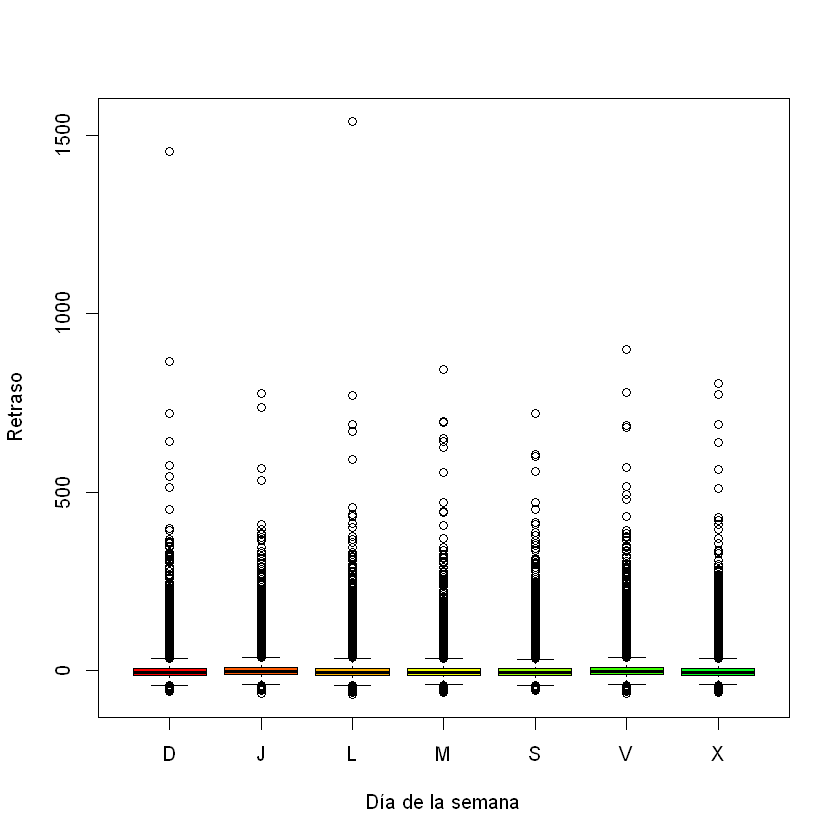

In [37]:
boxplot(data$arr_delay ~ data$diaSemana,col=rainbow(ncol(data)),xlab="Día de la semana",ylab="Retraso")

**10. Mostrar dos histogramas uno al lado de otro (usar mfrow con 1 fila y 2 columnas). Ambos deben mostrar la distribución de la variable distance, en un caso para los meses 6 a 9 (verano) y en otro, para los meses 1 a 5 (invierno). ¿Hay alguna diferencia?**

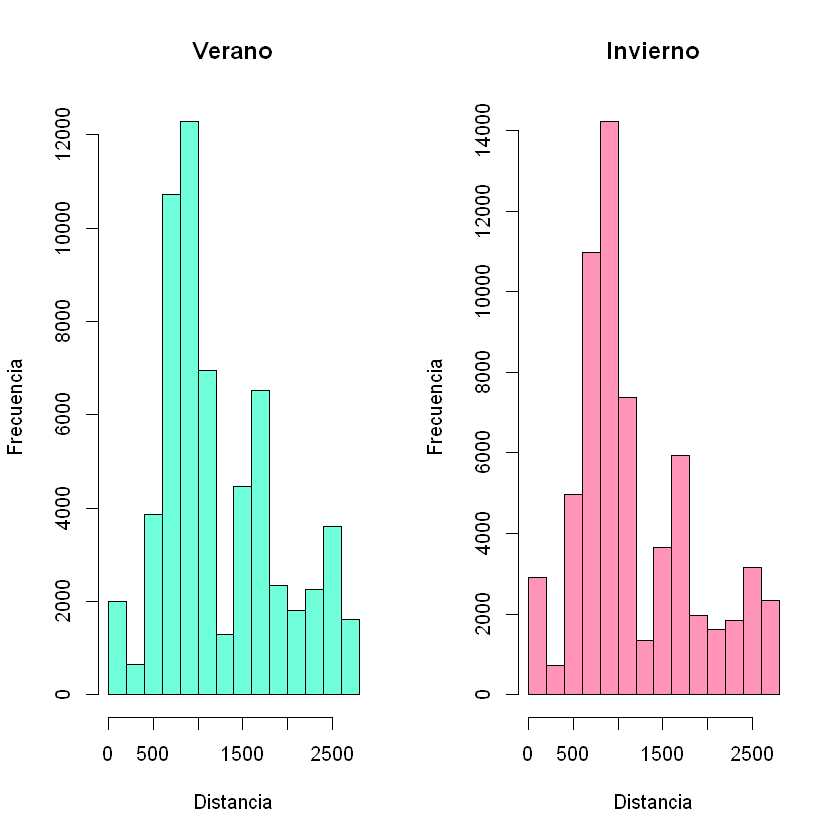

In [74]:
par(mfrow=c(1,2))
hist(data$distance[data$month>=6 & data$month<=9],col=rgb(0.2,1,0.8,0.7),xlab="Distancia",
     ylab="Frecuencia" ,main="Verano")
hist(data$distance[data$month<=5],col=rgb(1,0.4,0.6,0.7),xlab="Distancia",
     ylab="Frecuencia" ,main="Invierno")

EXISTE UNA DIFERENCIA ENTRE AMBOS HISTOGRAMA. ES POSIBLE VER QUE EN INVIERNO SE REPITE MÁS VECES UNA DISTANCIA EN CONCRETO. ADEMÁS DE ESO, EN INVIERNO SE PRESENTA EL MAYOR NÚMERO DE VUELOS.

In [72]:
length(c(data$distance[data$month>=6 & data$month<=9]))

[1] 60332

In [73]:
length(c(data$distance[data$month<=5]))

[1] 63050

**EN ADICIÓN A TODO LO ANTERIOR, DISEÑE UN DASHBOARD O INFORME EN POWER BI QUE ES POSIBLE VERLO A TRAVES DE LA SIGUIENTE LIGA:**